In [36]:
%pip install -U gymnasium
%pip install pygame
%pip install --upgrade pip setuptools wheel
%pip install opencv-python
%pip install "gymnasium[atari, accept-rom-license]"
%pip install inspect

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement inspect (from versions: none)
ERROR: No matching distribution found for inspect
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gymnasium as gym
import pygame
from tqdm import trange
import matplotlib.pyplot as plt
from IPython import display
import time
%matplotlib inline

Observation Space : Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Space : Discrete(3)


In [ ]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')
obs_space = env.observation_space
action_space = env.action_space
# structure and legitimate values for the observation, and action respectively
# Box and Discrete are two different data structures implemented in gymnasium library to represent obs-space and act-space for different kind of sceneraios
print("Observation Space : {}".format(obs_space))
print("Action Space : {}".format(action_space))

In [3]:
obs, info = env.reset()
print("The initial observation is {}".format(obs))

random_action = env.action_space.sample()
obs, reward, terminated, truncated, info = env.step(random_action)

print("The new observation is {}".format(obs))

time.sleep(0.001)
pygame.quit()
env.close()


The initial observation is [-0.5472264  0.       ]
The new observation is [-5.4704934e-01  1.7705886e-04]


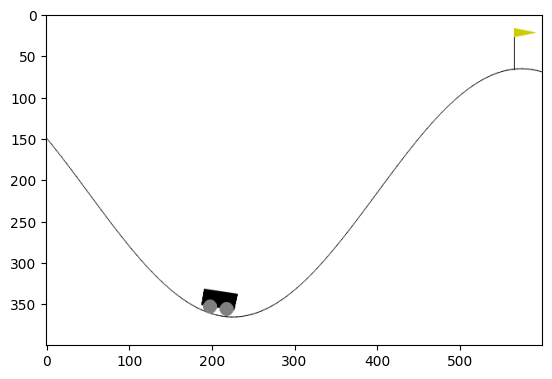

In [5]:
# if we want to see how environment looks in the current state we can use render
# This gives pop-up window, but need to close it using env.close()
# env.render(mode='rgb_array')
# env.render(mode='human')
# We are able to set the render mode at the start only, and after each action render is automatically displayed.

timesteps = 1500
env = gym.make('MountainCar-v0', render_mode='rgb_array')
obs, info = env.reset()

for i in range(timesteps):
    random_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(random_action)
    img = env.render()
    plt.imshow(img)
    plt.show()
    time.sleep(0.001)
    if terminated or truncated:
        obs, info = env.reset()
pygame.quit()
env.close()

In [7]:
# Wrapper
# it is provides functionality to modity various parts of environment based on our needs, this can be done by creating subclass of the Env too.
# There is another main complex scenarious where we will appreciate the use of wrapper.
env = gym.make('BreakoutNoFrameskip-v4', render_mode='human')

print("Observation Space is {}".format(env.observation_space))
print("Action Space is {}".format(env.action_space))

obs, info = env.reset()
for i in range(1000):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    time.sleep(0.01)
    if terminated or truncated:
        obs, info = env.reset()
pygame.quit()
env.close()

objc[14663]: Class SDLApplication is implemented in both /Users/subhashp/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pygame/.dylibs/libSDL2-2.0.0.dylib (0x13f1c12c8) and /Users/subhashp/.pyenv/versions/3.10.13/lib/python3.10/site-packages/ale_py/libSDL2-2.0.dylib (0x16c264080). One of the two will be used. Which one is undefined.
objc[14663]: Class SDLAppDelegate is implemented in both /Users/subhashp/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pygame/.dylibs/libSDL2-2.0.0.dylib (0x13f1c1318) and /Users/subhashp/.pyenv/versions/3.10.13/lib/python3.10/site-packages/ale_py/libSDL2-2.0.dylib (0x16c2640d0). One of the two will be used. Which one is undefined.
objc[14663]: Class SDLTranslatorResponder is implemented in both /Users/subhashp/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pygame/.dylibs/libSDL2-2.0.0.dylib (0x13f1c1390) and /Users/subhashp/.pyenv/versions/3.10.13/lib/python3.10/site-packages/ale_py/libSDL2-2.0.dylib (0x16c264148). One of the two will be

Observation Space is Box(0, 255, (210, 160, 3), uint8)
Action Space is Discrete(4)


/Users/subhashp/.pyenv/versions/3.10.13/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


In [48]:
# We can define a class of type gym.Wrapper and override the reset and return functions of the Breakout Env.

from collections import deque
from gym import spaces
import numpy as np

class ConcatObs(gym.Wrapper):
    def __init__(self):
        # gym.Wrapper.__init__(self, env)
        print(super())
        return

obs = ConcatObs()

[__main__.ConcatObs,
 gymnasium.core.Wrapper,
 gymnasium.core.Env,
 typing.Generic,
 object]

In [49]:
ConcatObs()

TypeError: Wrapper.__init__() missing 2 required positional arguments: 'self' and 'env'

In [50]:
import inspect

class animal():
    def __init__(self, x):
        self.x = x
        print("animal")

class dog(animal):
    def __init__(self):
        print(super())
x = dog()

<super: <class 'dog'>, <dog object>>
